# housekeeping

In [1]:
! pwd

/Users/domolm/Library/CloudStorage/GoogleDrive-domokomod5@gmail.com/My Drive/Learning/rakus/CI coding practice/Python


In [19]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

plt.rcParams['font.family'] = "YuGothic"

# 3.8

## 表3.3

In [3]:
data03 = pd.read_csv('../causality-main/data03.csv')
data03

,x1,y3,t1,y0t,y1t
0,70,74,1,62,74
1,70,63,0,63,74
2,70,73,1,62,73
3,70,71,1,65,71
4,70,74,1,63,74
5,75,67,0,67,77
6,75,77,1,68,77
7,75,68,0,68,76
8,75,77,1,68,77
9,75,78,1,67,78


In [4]:
# 数値要約
# dplyr::count(data03, t1, sort=TRUE)
data03.t1.value_counts(sort=False)

1    10
0    10
Name: t1, dtype: int64

In [5]:
# R: summary(df)
data03.describe()

,x1,y3,t1,y0t,y1t
count,20.000000,20.00000,20.000000,20.00000,20.000000
mean,80.000000,77.25000,0.500000,72.20000,82.000000
std,8.111071,7.02533,0.512989,7.56446,7.490345
min,70.000000,63.00000,0.000000,62.00000,71.000000
25%,73.750000,73.75000,0.000000,66.50000,75.500000
50%,80.000000,77.00000,0.500000,71.00000,81.500000
75%,86.250000,82.00000,1.000000,78.75000,88.750000
max,90.000000,91.00000,1.000000,82.00000,92.000000


In [6]:
# R: str(df)
data03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      20 non-null     int64
 1   y3      20 non-null     int64
 2   t1      20 non-null     int64
 3   y0t     20 non-null     int64
 4   y1t     20 non-null     int64
dtypes: int64(5)
memory usage: 928.0 bytes


In [7]:
# R: colSums(is.na(df))
data03.isnull().sum()

x1     0
y3     0
t1     0
y0t    0
y1t    0
dtype: int64

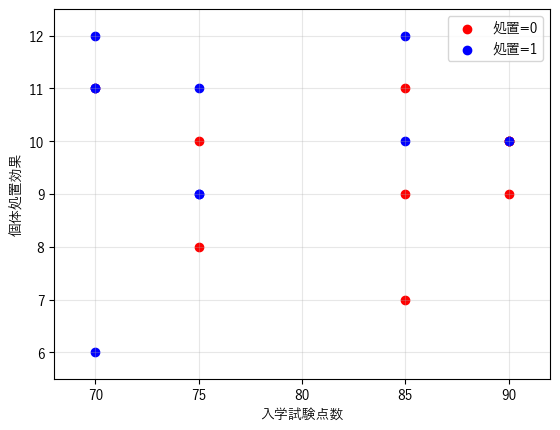

In [20]:
datas = [
    data03[data03.t1==0].reset_index(drop=True), 
    data03[data03.t1==1].reset_index(drop=True)
    ]
color = ['red', 'blue']
labels = ['処置=0', '処置=1']


fig, ax = plt.subplots()

for data, color, label in zip(datas, color, labels):
    ax.scatter(
        x=data['x1'], y=(data.y1t - data.y0t), c=color, label=label
        )
    
plt.xlabel('入学試験点数')
plt.ylabel('個体処置効果')
plt.xlim([68, 92])
plt.ylim([5.5, 12.5])
plt.grid(alpha=0.3)
plt.legend(facecolor='white')

In [35]:
data03[data03['t1']==0]['y3']

1     63
5     67
7     68
11    77
12    76
14    78
15    81
17    82
18    82
19    82
Name: y3, dtype: int64

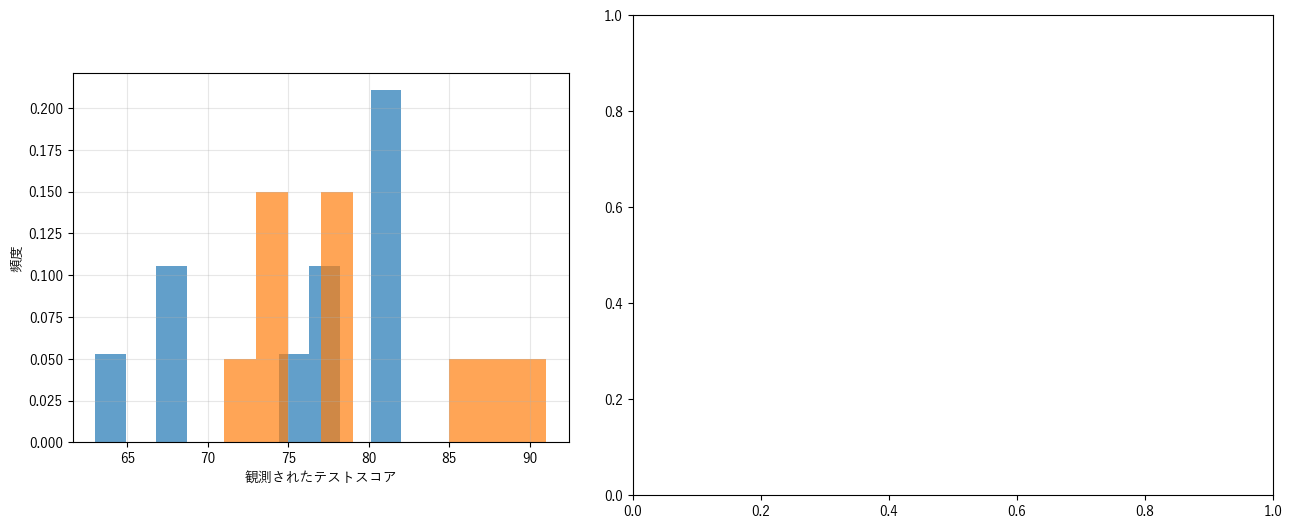

In [53]:
fig1, ax1 = plt.subplots()

ax1.hist(
    data03[data03['t1']==0]['y3'], density=True, 
    alpha=0.7, label='処置 = 0'
    )
ax1.hist(
    data03[data03['t1']==1]['y3'], density=True, 
    alpha=0.7, label='処置 = 1'
    )
ax1.set_xlabel('観測されたテストスコア')
ax1.set_ylabel('頻度')
ax1.grid(alpha=0.3)

ax2 = fig1.add_axes([1, 0, 1, 1])
